In [2]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from keyname import keyname as kn
from matplotlib import colors as mpl_colors
from teeplot import teeplot as tp

import Bio
import csv
import glob
import itertools
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import urllib.request as request
from copy import deepcopy

from etlib.SortableTree.SortableTree import SortableTree, find_leaves
from etlib.PlotTools.PlotTools import enable_pretty_graphing, set_color
enable_pretty_graphing()

In [3]:
morphs = {x['stint']: x[' morph'][1:] for x in pd.read_csv('morphs_by_stint.csv').to_dict(orient='records')}

In [8]:
sorted_tree = Phylo.read("data/sorted_phylogenetic_tree.xml", "phyloxml")
# sorted_tree.root_with_outgroup({"name": "0000000002"})

In [6]:
print(sorted_tree)

Phylogeny(rooted=True)
    Clade(branch_length=7.705931535120707, name='Inner99')
        Clade(branch_length=1.0, name='54')
        Clade(branch_length=11.47728995008498, name='Inner97')
            Clade(branch_length=11.038978576660156, name='Inner90')
                Clade(branch_length=7.731970548629761, name='Inner87')
                    Clade(branch_length=12.376192569732666, name='Inner81')
                        Clade(branch_length=507.03125, name='Inner76')
                            Clade(branch_length=75.0, name='Inner1')
                                Clade(branch_length=1.0, name='0')
                                Clade(branch_length=1.0, name='1')
                            Clade(branch_length=17.28125, name='Inner66')
                                Clade(branch_length=3.0, name='Inner46')
                                    Clade(branch_length=1.0, name='69')
                                    Clade(branch_length=1.0, name='71')
                               

teeplots/phylo_tree/viz=draw+ext=.pdf
teeplots/phylo_tree/viz=draw+ext=.png


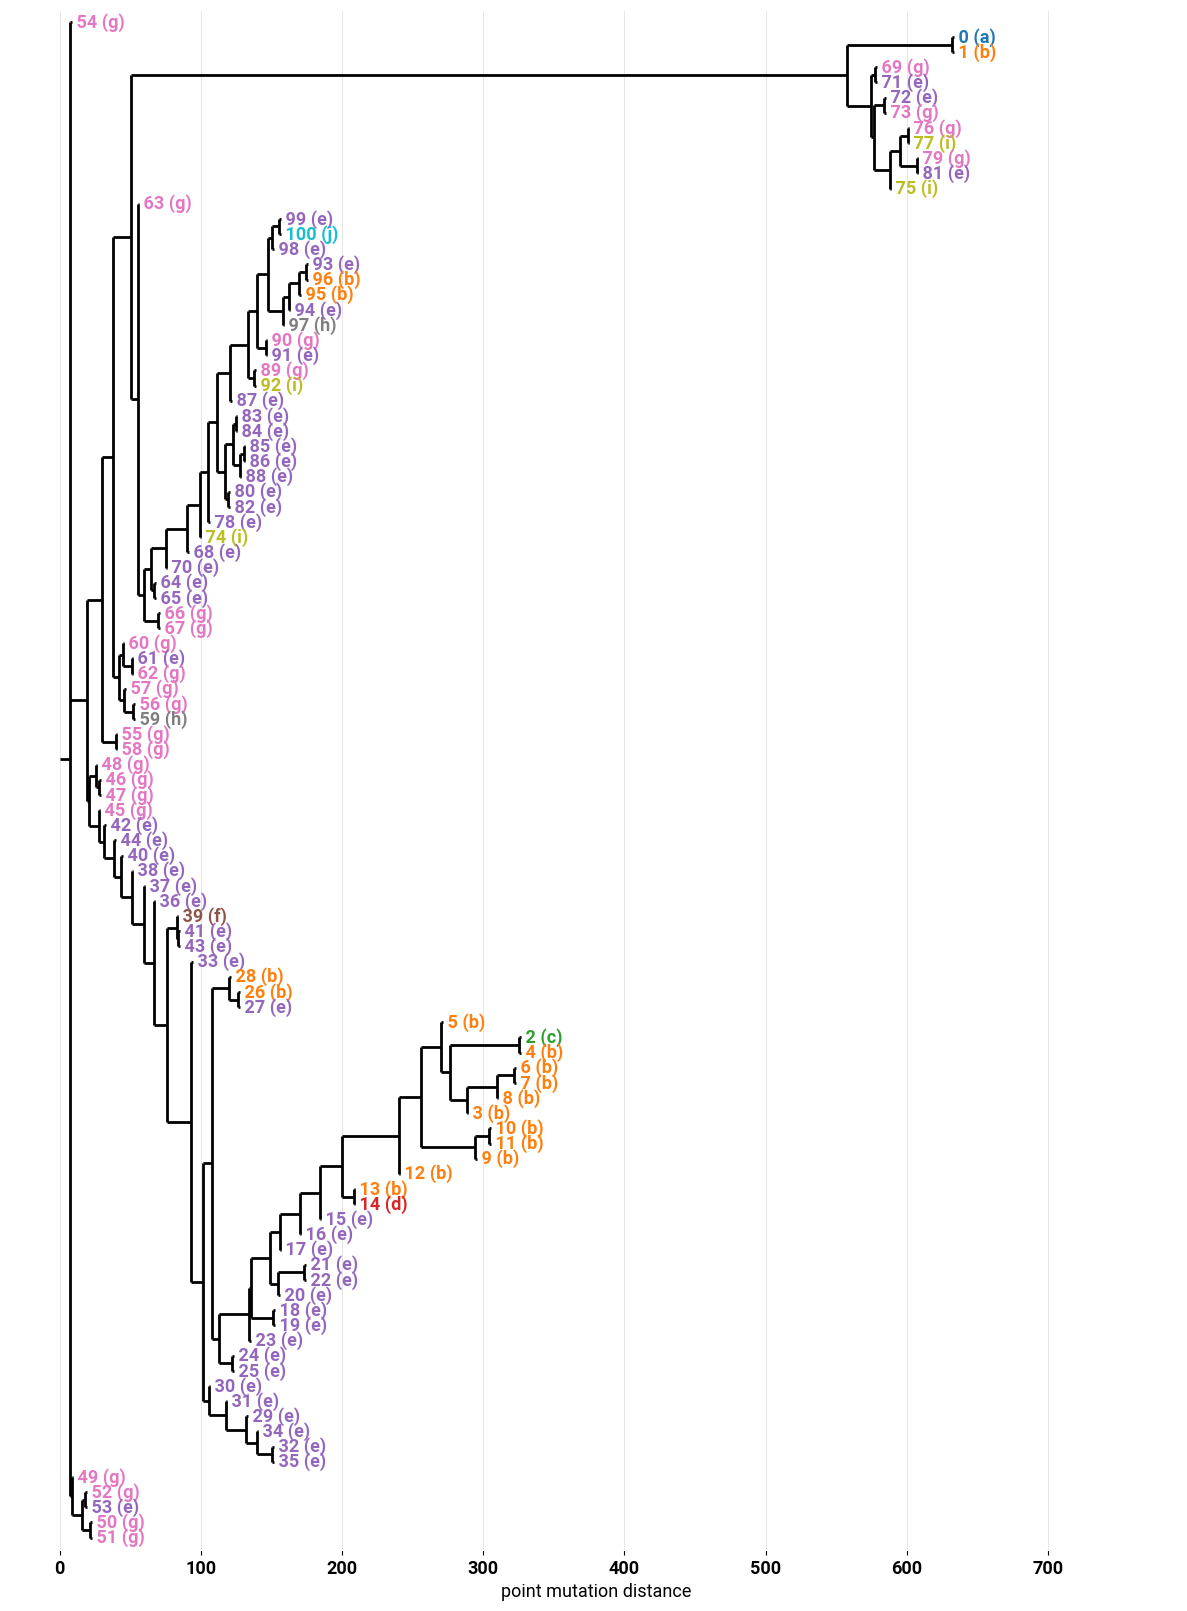

In [4]:
tp.tee(
    Phylo.draw,
    sorted_tree,
    label_func=lambda x: str(x) + " (" + morphs[int(x.name)] + ")" if 'Inner' not in str(x) else None,
    branch_labels=None,
    label_colors=lambda x: set_color(x),
    xlabel=["Phylogenetic Distance"],
    ylabel=[""],
    yticks={"ticks": [0]},
    grid={"visible": True, "which": "both", "axis": "x", "color": "gainsboro", "linewidth": "0.5"},
    do_show=False,
    teeplot_subdir="phylo_tree"
)

In [5]:
no_outliers_tree = deepcopy(sorted_tree)
no_outliers_tree.collapse_all(target=lambda x: x.label == '0')
no_outliers_tree.prune(target=lambda x: x.name == '0')
no_outliers_tree.prune(target=lambda x: x.name == '1')

Clade(branch_length=12.376192569732666, name='Inner81')

teeplots/phylo_tree_no_outliers/viz=draw+ext=.pdf
teeplots/phylo_tree_no_outliers/viz=draw+ext=.png


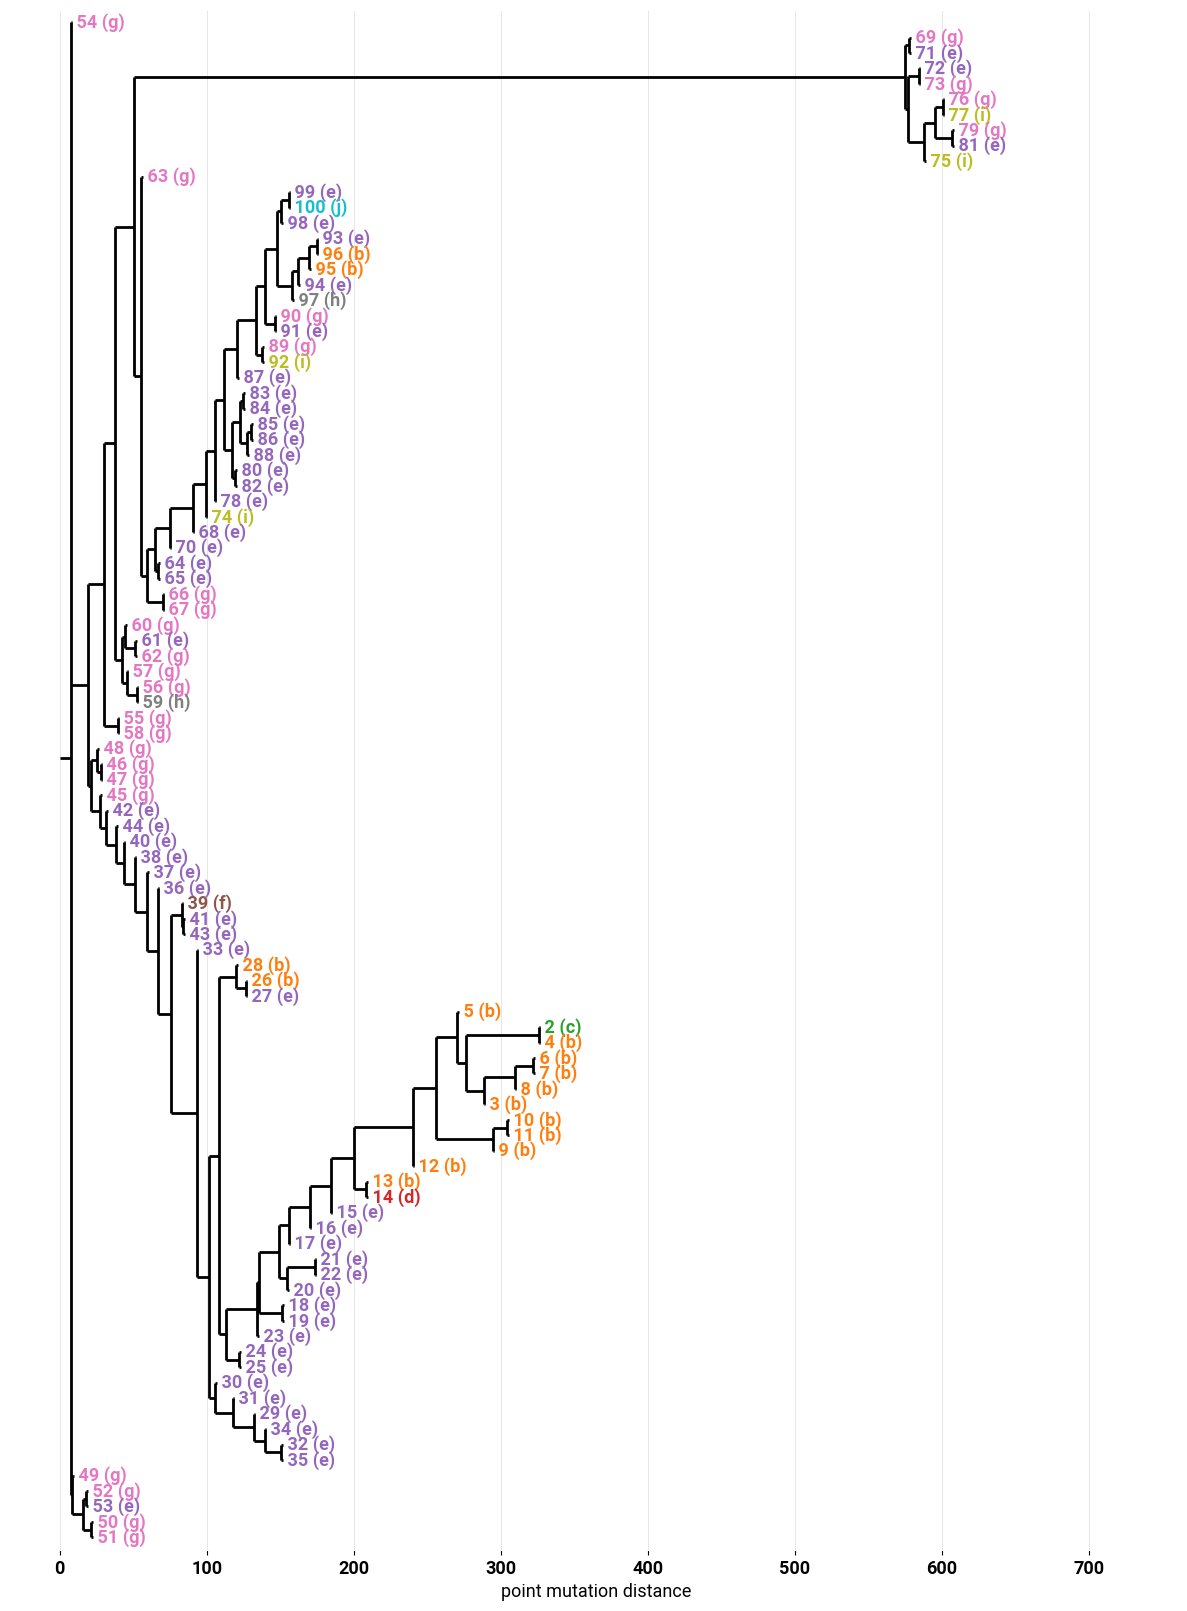

In [6]:
tp.tee(
    Phylo.draw,
    no_outliers_tree,
    label_func=lambda x: str(x) + " (" + morphs[int(x.name)] + ")" if 'Inner' not in str(x) else None,
    branch_labels=None,
    label_colors=lambda x: set_color(x),
    xlabel=["Phylogenetic Distance"],
    ylabel=[""],
    yticks={"ticks": [0]},
    grid={"visible": True, "which": "both", "axis": "x", "color": "gainsboro", "linewidth": "0.5"},
    do_show=False,
    teeplot_subdir="phylo_tree_no_outliers",
)